In [1]:
import gc
import sys
import weakref

In [2]:
class A:
    pass

In [2]:
from PIL import Image
import requests

def A():
    return Image.open(r'D:\ComfyUI\output\ComfyUI_00013_.png')

In [4]:
def f():
    a = A()
    print(sys.getrefcount(a))
    # 1 ref in locals, 1 ref in getrefcount

    a_weakref = weakref.ref(a)
    print(sys.getrefcount(a))
    print(a_weakref())

    del a
    print(a_weakref())
f()

2
2
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x2C084037460>
None


In [5]:
b = A()
print(sys.getrefcount(b))
# 1 ref in globals, 1 ref in getrefcount

b_weakref = weakref.ref(b)
print(b_weakref())

2
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x2C084037820>


In [6]:
print(sys.getrefcount(b))

2


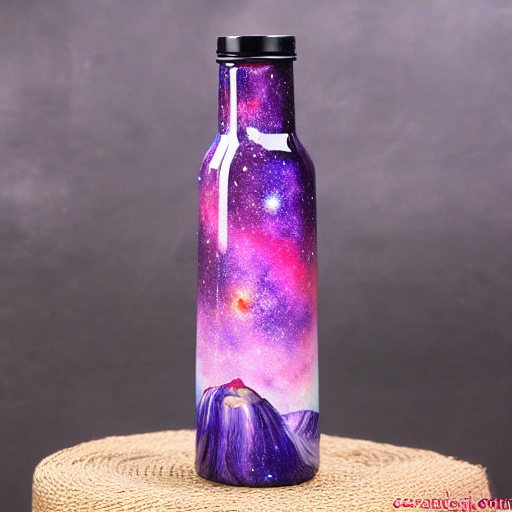

In [7]:
b

In [8]:
print(sys.getrefcount(b))
# class A: 9, 7 ref in IPython
# Image: 20, 18 ref in IPython

20


## del

In [8]:
del b
print(b_weakref(), sys.getrefcount(b_weakref()))

<__main__.A object at 0x00000266EF695BE0> 8


## reset_selective

In [7]:
%reset_selective -f ^b$

In [8]:
print(b_weakref(), sys.getrefcount(b_weakref()))
# The same as del

<__main__.A object at 0x000001CA6ED04A00> 8


## reset

In [9]:
%reset -f in
%reset -f out
%reset -f dhist

Flushing input history
Flushing output cache (1 entries)
Flushing directory history


In [10]:
print(b_weakref(), sys.getrefcount(b_weakref()))
# Better, but not enough

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x2C084037820> 4


## Display

In [63]:
__builtin__._ = True

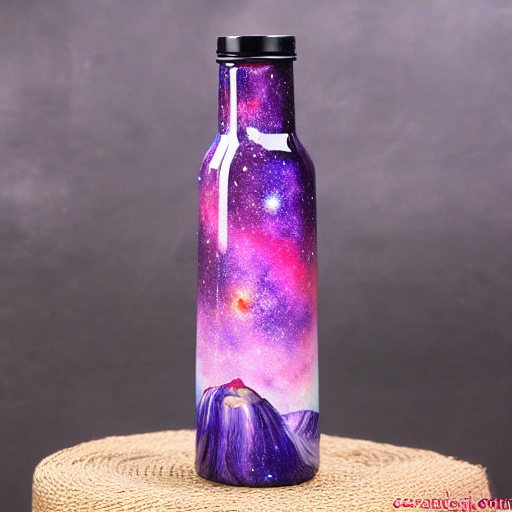

13


In [64]:
c = A()
c_weakref = weakref.ref(c)
display(c)
print(sys.getrefcount(c))

In [65]:
%xdel -n c
print(c_weakref(), sys.getrefcount(c_weakref()))

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x2C08532F280> 13


In [62]:
# %reset -f in
%reset -f out
# %reset -f dhist
# %reset_selective -f ^c$
del c

print(c_weakref(), sys.getrefcount(c_weakref()))

Flushing output cache (0 entries)
None 40472


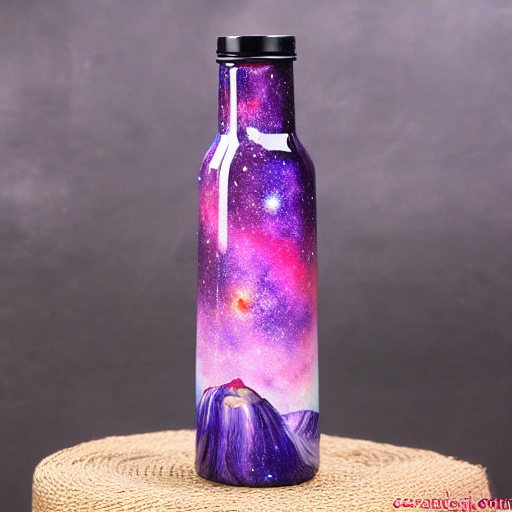

13
NameError: name 'c' is not defined
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x2C0835297C0> 15


In [49]:
def f():
    global c_weakref
    c = A()
    c_weakref = weakref.ref(c)
    display(c)
    print(sys.getrefcount(c))
f()
print(c_weakref(), sys.getrefcount(c_weakref()))

In [38]:
%reset -f out
print(c_weakref(), sys.getrefcount(c_weakref()))

Flushing output cache (0 entries)
None 40449


In [22]:
import ipywidgets as widgets

d = A()
d_weakref = weakref.ref(d)
display(widgets.HBox(children=[widgets.Image(value=d._repr_png_())]))
print(sys.getrefcount(d))

6


In [25]:
%reset -f in
%reset -f out
%reset -f dhist
%reset_selective -f ^d$

Flushing input history
Flushing output cache (0 entries)
Flushing directory history


In [26]:
print(d_weakref(), sys.getrefcount(d_weakref()))

None 40446


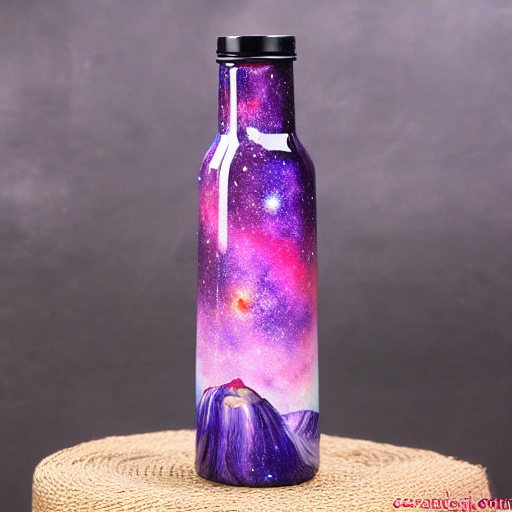

In [46]:
c = A()
c_weakref = weakref.ref(c)
display(c)

In [47]:
print(sys.getrefcount(c))

13


In [48]:
%reset -f out
del c
%reset_selective -f ^c$

print(c_weakref(), sys.getrefcount(c_weakref()))

Flushing output cache (0 entries)
None 40463


### WeakrefProxy

2


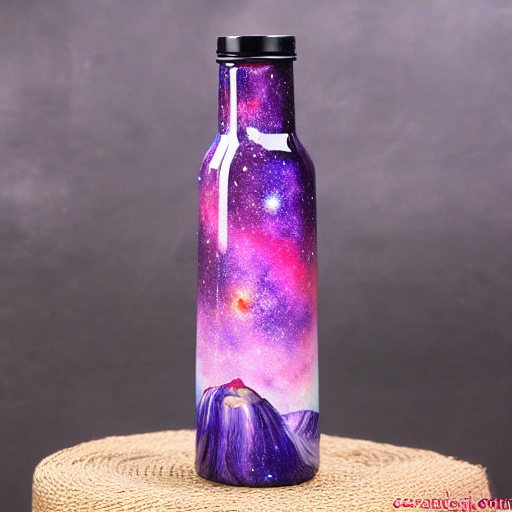

In [16]:
c = A()
print(sys.getrefcount(c))
# 2, 1 ref in globals, 1 ref in getrefcount
c_weakref = weakref.ref(c)
c_proxy = weakref.proxy(c)
# Without the following line, the ref count is 7
c_proxy._repr_png_ = lambda: Image.Image._repr_png_(c_proxy)
display(c_proxy)
del c

In [17]:
print(c_weakref(), sys.getrefcount(c_weakref()))

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x28E1135EF40> 5


In [9]:

import inspect

for v in vars(Image.Image):
    if inspect.isfunction(getattr(Image.Image, v)):
        setattr(c_proxy, v, lambda)

mappingproxy({'__module__': 'PIL.Image',
              '__doc__': "\n    This class represents an image object.  To create\n    :py:class:`~PIL.Image.Image` objects, use the appropriate factory\n    functions.  There's hardly ever any reason to call the Image constructor\n    directly.\n\n    * :py:func:`~PIL.Image.open`\n    * :py:func:`~PIL.Image.new`\n    * :py:func:`~PIL.Image.frombytes`\n    ",
              'format': None,
              'format_description': None,
              '_close_exclusive_fp_after_loading': True,
              '__init__': <function PIL.Image.Image.__init__(self)>,
              '__getattr__': <function PIL.Image.Image.__getattr__(self, name)>,
              'width': <property at 0x28e110a8180>,
              'height': <property at 0x28e110a8770>,
              'size': <property at 0x28e110a89a0>,
              '_new': <function PIL.Image.Image._new(self, im)>,
              '__enter__': <function PIL.Image.Image.__enter__(self)>,
              '__exit__': 

In [71]:
%reset -f out
print(c_weakref(), sys.getrefcount(c_weakref()))

Flushing output cache (0 entries)
None 41139
